In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from scipy.special import gamma
from scipy.optimize import fsolve

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    plt.colorbar(label='Density')




    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 20
    large_y = fsolve(equation, initial_guess)[0]


    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))
    plt.axvline(x=mu_0+x, color='y', linestyle='--')
    plt.axvline(x=mu_0-x, color='y', linestyle='--')
    
    # plt.axhline(y=1.8042617241070633, color='g', linestyle='--')
    plt.axhline(y=small_y, color='y', linestyle='--')
    plt.axhline(y=large_y, color='y', linestyle='--')


    
    # CDF에 해당하는 등고선 그리기
    plt.contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    plt.title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    plt.xlabel('Mean (μ)')
    plt.ylabel('Variance (σ²)')
    plt.grid(True)
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [2]:
def transpose(segment, mu_0, lambda_, alpha, beta):
    segment[:,0] = segment[:,0]/np.sqrt(lambda_/beta) + mu_0
    segment[:,1] = segment[:,1]*beta
    return segment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 20
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')


    
    # CDF에 해당하는 등고선 그리기
    ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)

    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 0.1
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 5
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)/np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x * np.sqrt(lambda_/beta)+mu_0, second_y * beta

    ax[0].scatter(converted_x, converted_y, color='g')
    
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from matplotlib.collections import LineCollection
import copy

dmu = (5+5)/100
dsigma2 = (20-0.01)/100
dA = dmu * dsigma2

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum *= dA
    # cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))

    
    # CDF에 해당하는 등고선 그리기
    ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    # CDF에 해당하는 등고선 그리기
    ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[1].set_title(f'NIG PDF with μ₀={0:.4f}, λ={1:.4f}, α={alpha:.4f}, β={1:.4f} and CDF = {target_cdf:.4f}')
    ax[1].set_xlabel('Mean (μ)')
    ax[1].set_ylabel('Variance (σ²)')
    ax[1].grid(True)
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from matplotlib.collections import LineCollection
import copy

dmu = (5+5)/100
dsigma2 = (20-0.01)/100
dA = dmu * dsigma2

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum *= dA
    # cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    edge_x, edge_y = mu_0+x,y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')

    ax[0].scatter(edge_x, edge_y, color='y', marker='x')

    
    # CDF에 해당하는 등고선 그리기
    ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 20, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    segments = copy.deepcopy(ctr.allsegs)
    segments = [transpose(segments[0][0], mu_0, lambda_, alpha, beta)]
    line_collection = LineCollection(segments, colors='b')
    ax[0].add_collection(line_collection)
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)/np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x * np.sqrt(lambda_/beta)+mu_0, second_y * beta

    ax[0].scatter(converted_x, converted_y, color='g')

    ax[1].scatter((edge_x - mu_0)/np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')
    # CDF에 해당하는 등고선 그리기
    ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[1].set_title(f'NIG PDF with μ₀={0:.4f}, λ={1:.4f}, α={alpha:.4f}, β={1:.4f} and CDF = {target_cdf:.4f}')
    ax[1].set_xlabel('Mean (μ)')
    ax[1].set_ylabel('Variance (σ²)')
    ax[1].grid(True)
    plt.show()

    
    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import invgamma, norm
from IPython.display import display
from matplotlib.collections import LineCollection
import copy

dmu = (5+5)/100
dsigma2 = (20-0.01)/100
dA = dmu * dsigma2

# NIG 분포의 결합 확률밀도함수 정의 (평균과 분산에 대한)
def nig_joint_pdf(mu, sigma2, mu_0, lambda_, alpha, beta):
    # Normal part (mean = mu, variance = sigma2)
    norm_pdf = norm.pdf(mu, mu_0, np.sqrt(sigma2 / lambda_))
    
    # Inverse gamma part (variance = sigma2)
    invgamma_pdf = invgamma.pdf(sigma2, alpha, scale=beta)
    
    return norm_pdf * invgamma_pdf

# CDF에 해당하는 등고선 계산
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum *= dA
    # cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value

# 그래프 업데이트 함수
def update(mu_0, lambda_, alpha, beta, target_cdf):
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(pdf_values, target_cdf)
    
    # 그래프 그리기
    fig, ax = plt.subplots(1,2, figsize=(16,6))#plt.figure(figsize=(8, 6))


    # First Figure
    ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(beta) *np.sqrt(lambda_) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=beta) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = beta/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(lambda_)*beta**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/lambda_*np.log(c/invgamma.pdf(y,alpha,scale=beta)*np.sqrt(2*np.pi*y)/np.sqrt(lambda_)))

    original_x, original_y = mu_0+x,large_y
    edge_x, edge_y = mu_0+x,y
    
    ax[0].axvline(x=mu_0+x, color='y', linestyle='--')
    ax[0].axvline(x=mu_0-x, color='y', linestyle='--')
    
    ax[0].axhline(y=small_y, color='y', linestyle='--')
    ax[0].axhline(y=large_y, color='y', linestyle='--')


    ax[0].scatter(mu_0+x,large_y, color='r')

    ax[0].scatter(edge_x, edge_y, color='y', marker='x')

    
    # CDF에 해당하는 등고선 그리기
    ctr = ax[0].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
        # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = pdf_values.flatten()[mask]
    print("original sum: ",np.sum(masked_values) * dA)

    
    ax[0].set_title(f'NIG PDF with μ₀={mu_0:.4f}, λ={lambda_:.4f}, α={alpha:.4f}, β={beta:.4f} and CDF = {target_cdf:.4f}')
    ax[0].set_xlabel('Mean (μ)')
    ax[0].set_ylabel('Variance (σ²)')
    ax[0].grid(True)


    # Second Figure
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)
    ax[1].contourf(mu_grid, sigma2_grid, std_pdf_values, levels=np.linspace(0, std_pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[1].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)

    # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = std_pdf_values.flatten()[mask]
    print("std sum: ",np.sum(masked_values) * dA)

    
    segments = copy.deepcopy(ctr.allsegs)
    segments = [transpose(segments[0][0], mu_0, lambda_, alpha, beta)]
    line_collection = LineCollection(segments, colors='b')
    ax[0].add_collection(line_collection)


        # get contour area 
    contour_path = line_collection.get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = pdf_values.flatten()[mask]
    print("reverse sum: ",np.sum(masked_values) * dA)
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value

    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]

    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[1].axvline(x=x, color='y', linestyle='--')
    ax[1].axvline(x=-x, color='y', linestyle='--')
    
    ax[1].axhline(y=small_y, color='y', linestyle='--')
    ax[1].axhline(y=large_y, color='y', linestyle='--')


    st_x, st_y = (original_x - mu_0)*np.sqrt(lambda_/beta), original_y/beta
    ax[1].scatter(st_x, st_y, color='r')

    second_x, second_y = x, large_y
    # ax[1].scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x / np.sqrt(lambda_/beta)+mu_0, second_y * beta

    # ax[0].scatter(converted_x, converted_y, color='y')

    ax[1].scatter((edge_x - mu_0)*np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')

    ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[contour_level], colors='red', linewidths=2)
    ax[1].set_title(f'NIG PDF with μ₀={0:.4f}, λ={1:.4f}, α={alpha:.4f}, β={1:.4f} and CDF = {target_cdf:.4f}')
    ax[1].set_xlabel('Mean (μ)')
    ax[1].set_ylabel('Variance (σ²)')
    ax[1].grid(True)

    plt.show()

# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')
cdf_slider = widgets.FloatSlider(value=0.5, min=0.01, max=0.99, step=0.01, description='Target CDF')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider, cdf_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
    'target_cdf': cdf_slider
})

display(ui, out)


Output()

# error diff 계산하기

std sum:  0.7000495069002668
(100,) (100,) (100, 100)
std sum:  0.800045395667047
(100,) (100,) (100, 100)
std sum:  0.9000540581292009
(100,) (100,) (100, 100)
std sum:  0.9500068863247134
(100,) (100,) (100, 100)


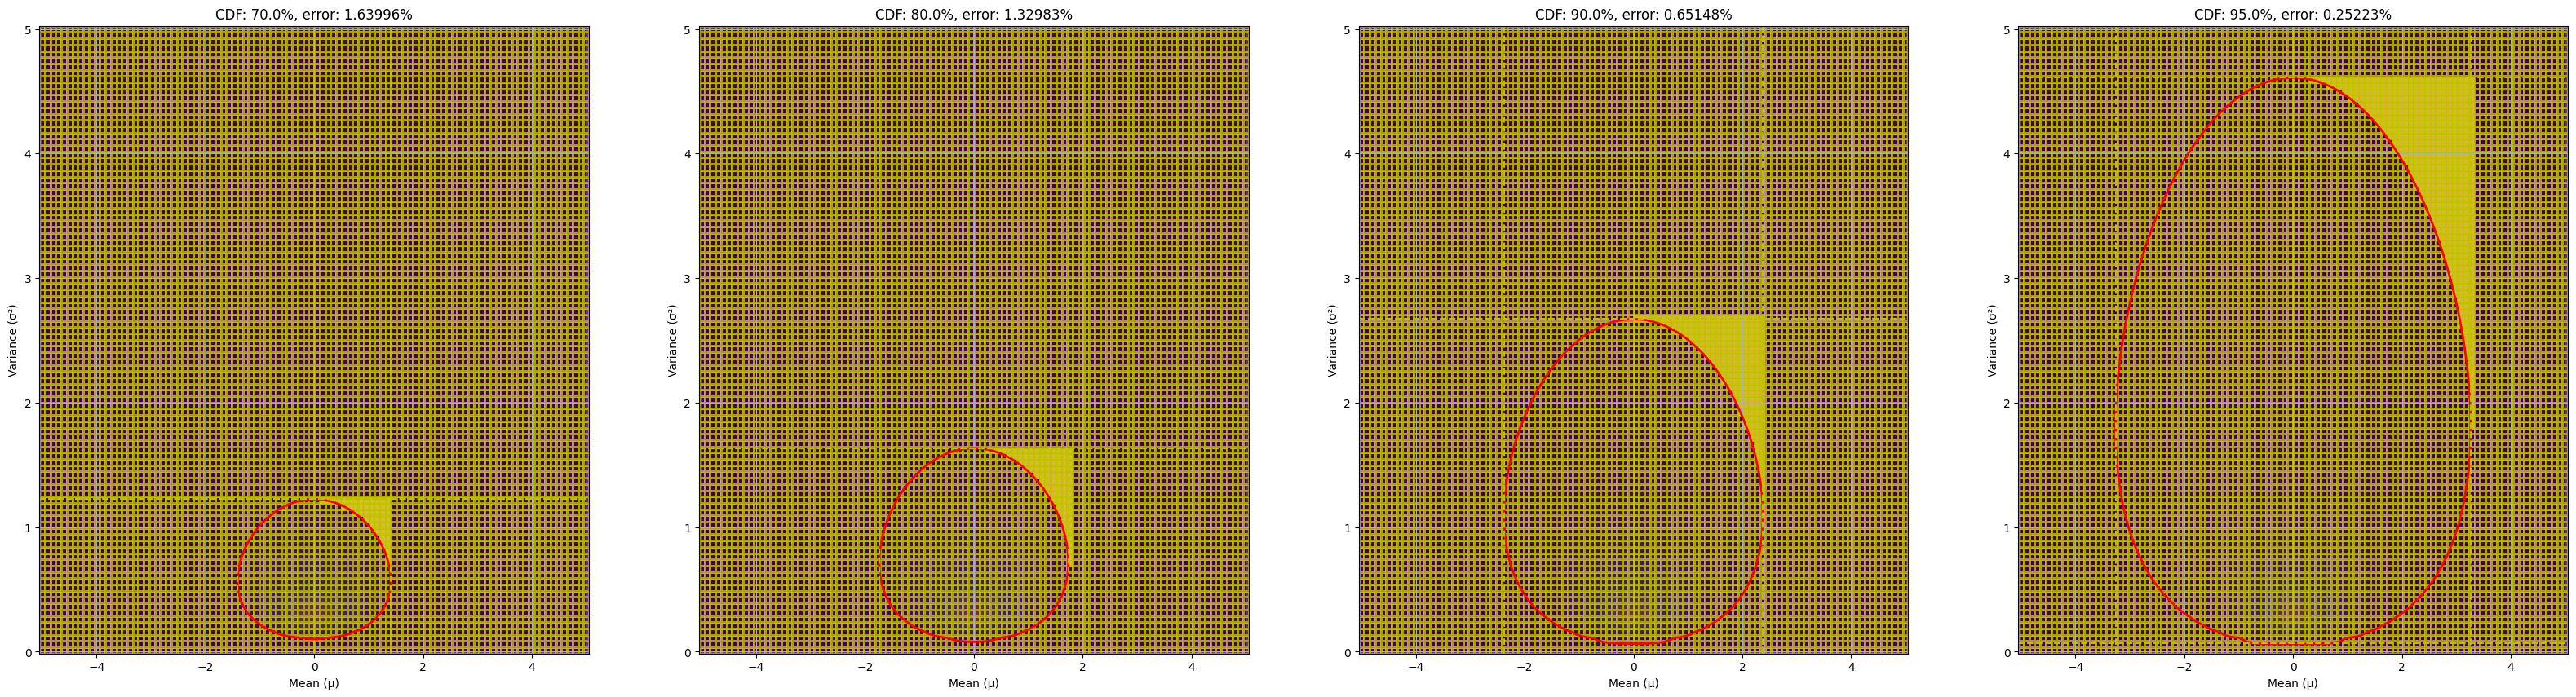

In [7]:
mu_0 = 1.2
lambda_ = 1.8
alpha = 2.0
beta = 2.0

fig, ax = plt.subplots(1,4, figsize=(40,10))

cdf_list = [0.7, 0.8, 0.9, 0.95]
for fig_idx, target_cdf in enumerate(cdf_list):
    dmu = (5+5)/100
    dsigma2 = (5-0.01)/100
    dA = dmu * dsigma2
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)
    ax[fig_idx].contourf(mu_grid, sigma2_grid, std_pdf_values, levels=np.linspace(0, std_pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[fig_idx].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = std_pdf_values.flatten()[mask]
    print("std sum: ",np.sum(masked_values) * dA)
    
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value
    
    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]
    
    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[fig_idx].axvline(x=x, color='y', linestyle='--')
    ax[fig_idx].axvline(x=-x, color='y', linestyle='--')
    
    ax[fig_idx].axhline(y=small_y, color='y', linestyle='--')
    ax[fig_idx].axhline(y=large_y, color='y', linestyle='--')
    
    
    quarter_mask = mask.reshape(100,100).copy()
    error_mask = np.zeros_like(quarter_mask)
    error_mask[np.argmin(np.abs(sigma2_values - y)):np.argmin(np.abs(sigma2_values - large_y))+1, 50:np.argmin(np.abs(mu_values - x))+1] = True
    quarter_mask[:np.argmin(np.abs(sigma2_values - y)),:] = False
    quarter_mask[:,:50] = False
    diff_mask = np.logical_xor(error_mask, quarter_mask)
    diff_masked_values = std_pdf_values.flatten()[diff_mask.flatten()]
    ax[fig_idx].set_title(f"CDF: {target_cdf*100}%, error: {np.sum(diff_masked_values) * dA * 100:.05f}%")
    print(mu_values.shape, sigma2_values.shape, diff_mask.shape)
    # plt.fill_between(mu_values, sigma2_values, where=diff_mask, color='y', alpha=0.5)
    
    ax[fig_idx].pcolormesh(mu_values, sigma2_values, diff_mask, color='y', alpha=0.8)
    # st_x, st_y = (original_x - mu_0)*np.sqrt(lambda_/beta), original_y/beta
    # plt.scatter(st_x, st_y, color='r')
    
    second_x, second_y = x, large_y
    # plt.scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x / np.sqrt(lambda_/beta)+mu_0, second_y * beta
    ax[fig_idx].set_xlabel('Mean (μ)')
    ax[fig_idx].set_ylabel('Variance (σ²)')
    ax[fig_idx].grid(True)
# plt.scatter((edge_x - mu_0)*np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')

plt.show()

# alpha 값에 따른 error 변화

std sum:  0.900000262802712
(100,) (100,) (100, 100)
std sum:  0.9000019693888831
(100,) (100,) (100, 100)
std sum:  0.9000031430284613
(100,) (100,) (100, 100)
std sum:  0.9000278828597049
(100,) (100,) (100, 100)


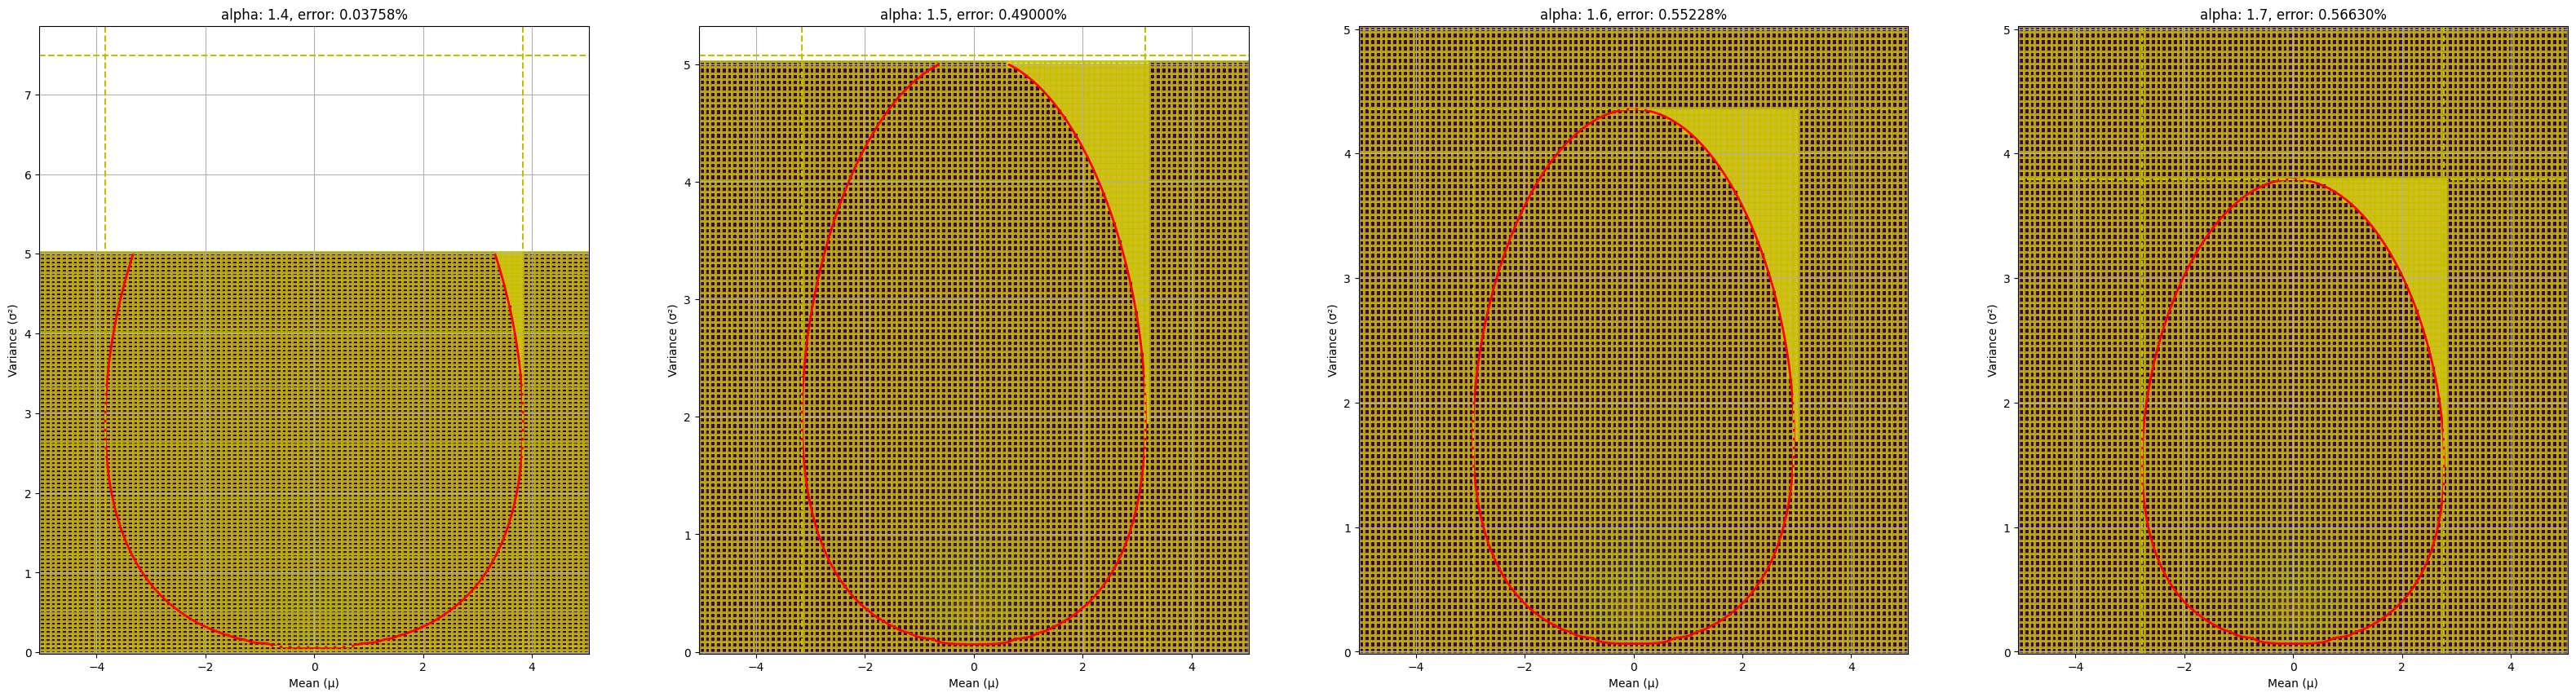

In [8]:
mu_0 = 1.2
lambda_ = 1.8
target_cdf = 0.9
beta = 2.0

fig, ax = plt.subplots(1,4, figsize=(40,10))

alpha_list = [1.4, 1.5, 1.6, 1.7]#[1.7, 2.5, 3.2, 4.0]
for fig_idx, alpha in enumerate(alpha_list):
    dmu = (5+5)/100
    dsigma2 = (5-0.01)/100
    dA = dmu * dsigma2
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)
    ax[fig_idx].contourf(mu_grid, sigma2_grid, std_pdf_values, levels=np.linspace(0, std_pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[fig_idx].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = std_pdf_values.flatten()[mask]
    print("std sum: ",np.sum(masked_values) * dA)
    
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value
    
    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]
    
    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[fig_idx].axvline(x=x, color='y', linestyle='--')
    ax[fig_idx].axvline(x=-x, color='y', linestyle='--')
    
    ax[fig_idx].axhline(y=small_y, color='y', linestyle='--')
    ax[fig_idx].axhline(y=large_y, color='y', linestyle='--')
    
    
    quarter_mask = mask.reshape(100,100).copy()
    error_mask = np.zeros_like(quarter_mask)
    error_mask[np.argmin(np.abs(sigma2_values - y)):np.argmin(np.abs(sigma2_values - large_y))+1, 50:np.argmin(np.abs(mu_values - x))+1] = True
    quarter_mask[:np.argmin(np.abs(sigma2_values - y)),:] = False
    quarter_mask[:,:50] = False
    diff_mask = np.logical_xor(error_mask, quarter_mask)
    diff_masked_values = std_pdf_values.flatten()[diff_mask.flatten()]
    ax[fig_idx].set_title(f"alpha: {alpha}, error: {np.sum(diff_masked_values) * dA * 100:.05f}%")
    print(mu_values.shape, sigma2_values.shape, diff_mask.shape)
    # plt.fill_between(mu_values, sigma2_values, where=diff_mask, color='y', alpha=0.5)
    
    ax[fig_idx].pcolormesh(mu_values, sigma2_values, diff_mask, color='y', alpha=0.8)
    # st_x, st_y = (original_x - mu_0)*np.sqrt(lambda_/beta), original_y/beta
    # plt.scatter(st_x, st_y, color='r')
    
    second_x, second_y = x, large_y
    # plt.scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x / np.sqrt(lambda_/beta)+mu_0, second_y * beta
    ax[fig_idx].set_xlabel('Mean (μ)')
    ax[fig_idx].set_ylabel('Variance (σ²)')
    ax[fig_idx].grid(True)
# plt.scatter((edge_x - mu_0)*np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')

plt.show()

# 2 번째 error diff 계산.

std sum:  0.7000495069002668
new std sum:  0.8004325290350242
diff:  0.10038302213475737
std sum:  0.800045395667047
new std sum:  0.8711704205915168
diff:  0.07112502492446988
std sum:  0.9000540581292009
new std sum:  0.9357328763607111
diff:  0.03567881823151026
std sum:  0.9500068863247134
new std sum:  0.9602926696261175
diff:  0.010285783301404092


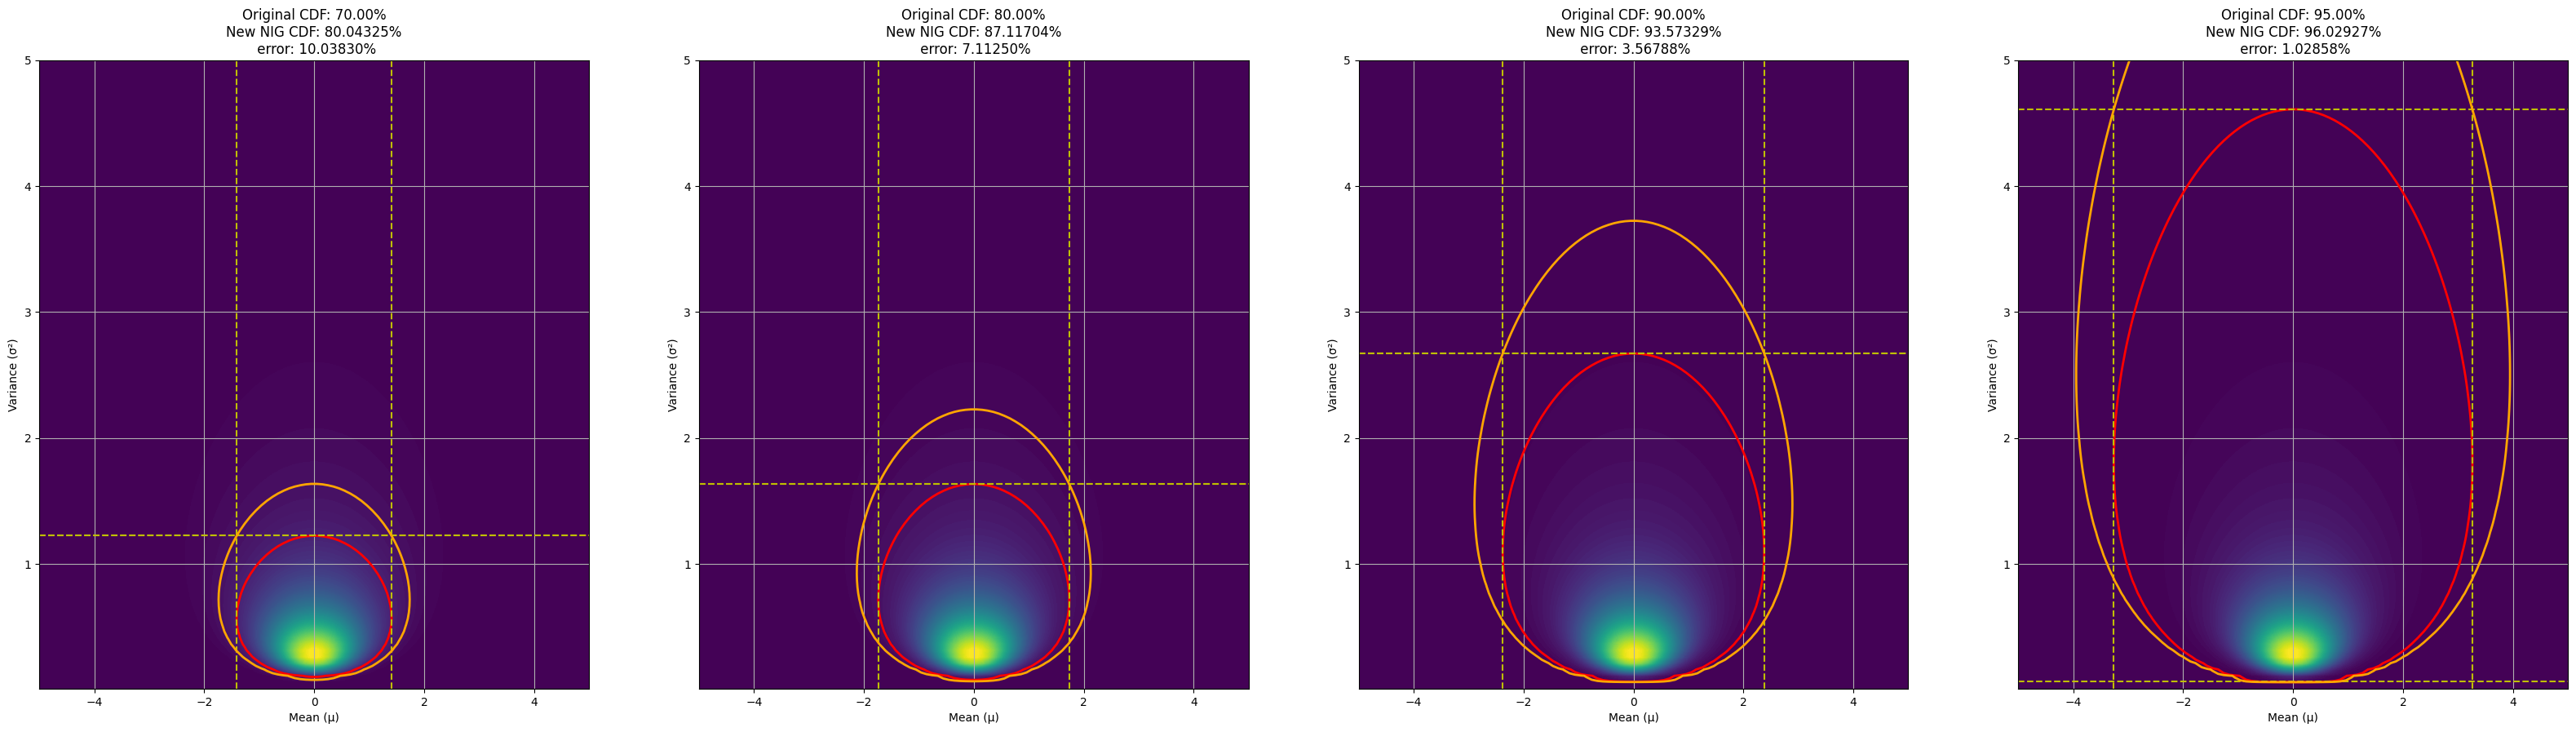

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [9]:
mu_0 = 1.2
lambda_ = 1.8
alpha = 2.0
beta = 2.0

fig, ax = plt.subplots(1,4, figsize=(40,10))

cdf_list = [0.7, 0.8, 0.9, 0.95]
for fig_idx, target_cdf in enumerate(cdf_list):
    dmu = (5+5)/100
    dsigma2 = (5-0.01)/100
    dA = dmu * dsigma2
    plt.figure(figsize=(10,10))
    mu_values = np.linspace(-5, 5, 100)
    sigma2_values = np.linspace(0.01, 5, 100)
    
    # 그리드를 만들어 결합 확률 밀도를 계산
    mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
    std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)
    
    # 입력받은 CDF 값에 해당하는 등고선 값을 계산
    contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)
    ax[fig_idx].contourf(mu_grid, sigma2_grid, std_pdf_values, levels=np.linspace(0, std_pdf_values.max(), 100), cmap='viridis')
    # CDF에 해당하는 등고선 그리기
    ctr = ax[fig_idx].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)
    
    # get contour area 
    contour_path = ctr.collections[0].get_paths()[0]
    mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    masked_values = std_pdf_values.flatten()[mask]
    print("std sum: ",np.sum(masked_values) * dA)
    
    
    c = contour_level
    target_pdf_value = c / (gamma(alpha+0.5) / gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
    def equation(x):
        return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value
    
    # small
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha+1)/10
    small_y = fsolve(equation, initial_guess)[0]
    
    # large
    # 초기 추정값 설정 후 방정식 해결
    initial_guess = 1/(alpha-1)
    large_y = fsolve(equation, initial_guess)[0]
    
    y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
    x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
    ax[fig_idx].axvline(x=x, color='y', linestyle='--')
    ax[fig_idx].axvline(x=-x, color='y', linestyle='--')
    
    ax[fig_idx].axhline(y=small_y, color='y', linestyle='--')
    ax[fig_idx].axhline(y=large_y, color='y', linestyle='--')
    
    
    # quarter_mask = mask.reshape(100,100).copy()
    # error_mask = np.zeros_like(quarter_mask)
    # error_mask[np.argmin(np.abs(sigma2_values - y)):np.argmin(np.abs(sigma2_values - large_y))+1, 50:np.argmin(np.abs(mu_values - x))+1] = True
    # quarter_mask[:np.argmin(np.abs(sigma2_values - y)),:] = False
    # quarter_mask[:,:50] = False
    # diff_mask = np.logical_xor(error_mask, quarter_mask)
    # diff_masked_values = std_pdf_values.flatten()[diff_mask.flatten()]
    # print("diff sum: ",np.sum(diff_masked_values) * dA)
    # print(mu_values.shape, sigma2_values.shape, diff_mask.shape)
    # plt.fill_between(mu_values, sigma2_values, where=diff_mask, color='y', alpha=0.5)
    
    # plt.pcolormesh(mu_values, sigma2_values, diff_mask, color='y', alpha=0.8)
    # st_x, st_y = (original_x - mu_0)*np.sqrt(lambda_/beta), original_y/beta
    # plt.scatter(st_x, st_y, color='r')
    
    second_x, second_y = x, large_y
    # plt.scatter(second_x, second_y, color='g')
    converted_x, converted_y = second_x / np.sqrt(lambda_/beta)+mu_0, second_y * beta
    
    # plt.scatter((edge_x - mu_0)*np.sqrt(lambda_/beta), edge_y/beta, marker='x', color='y')
    
    new_contour_level = nig_joint_pdf(x, large_y, 0, 1, alpha, 1)
    new_ctr = ax[fig_idx].contour(mu_grid, sigma2_grid, std_pdf_values, levels=[new_contour_level], colors='orange', linewidths=2)
    # get contour area 
    contour_path = new_ctr.collections[0].get_paths()[0]
    new_mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
    new_masked_values = std_pdf_values.flatten()[new_mask]
    print("new std sum: ",np.sum(new_masked_values) * dA)
    print("diff: ", (np.sum(new_masked_values) - np.sum(masked_values)) * dA)
    ax[fig_idx].set_title(f'Original CDF: {target_cdf*100:.02f}%\nNew NIG CDF: {np.sum(new_masked_values) * dA*100:.05f}%\n error: {(np.sum(new_masked_values) - np.sum(masked_values)) * dA*100:.05f}%')
    ax[fig_idx].set_xlabel('Mean (μ)')
    ax[fig_idx].set_ylabel('Variance (σ²)')
    ax[fig_idx].grid(True)
plt.show()

In [10]:
std_pdf_values.sum() * dA

0.9627627917165659

In [11]:
print(small_y, large_y)
np.argmin(np.abs(sigma2_values - small_y)), np.argmin(np.abs(sigma2_values - large_y))
# sigma2_values.shape

0.06641440317365609 4.609737398248949


(1, 91)

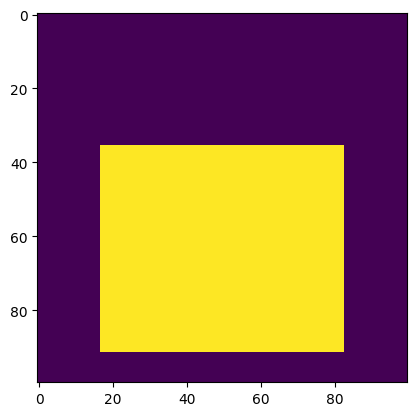

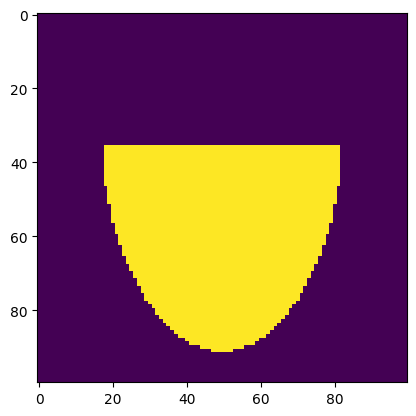

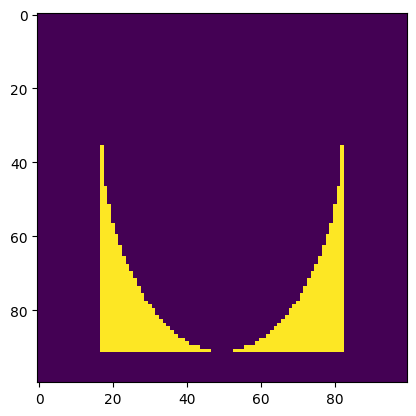

In [12]:

quarter_mask = mask.reshape(100,100).copy()
error_mask = np.zeros_like(quarter_mask)
error_mask[np.argmin(np.abs(sigma2_values - y)):np.argmin(np.abs(sigma2_values - large_y))+1, np.argmin(np.abs(mu_values - -x)):np.argmin(np.abs(mu_values - x))+1] = True
quarter_mask[:np.argmin(np.abs(sigma2_values - y)),:] = False
# quarter_mask[:,:50] = False
diff_mask = np.logical_xor(error_mask, quarter_mask)
# error_mask = np.logical_xor(error_mask, quarter_mask)
# # error_mask = np.logical_and(error_mask, quarter_mask)
# plt.imshow(error_mask[25:75, 475:525])
# plt.show()
# plt.imshow(quarter_mask[25:75, 475:525])
# plt.show()
# plt.imshow(np.logical_or(error_mask[25:75, 475:525], quarter_mask[25:75, 475:525]))
# plt.show()

plt.imshow(error_mask)
plt.show()
plt.imshow(quarter_mask)
plt.show()
plt.imshow(np.logical_xor(error_mask, quarter_mask))
plt.show()

pdf value:  0.0036442331928330093
pdf value:  3.6645032006292445e-05


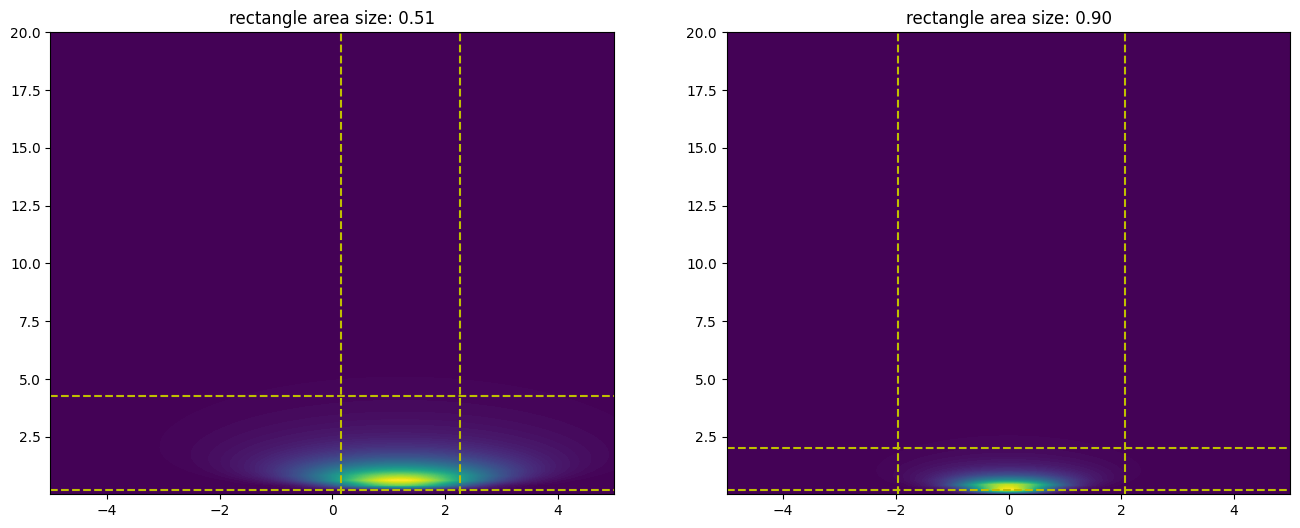

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
mu_0 = 1.2
lambda_ = 0.6
alpha = 2.1
beta = 2.1
# Second Figure
mu_s, mu_l, mu_n = -5, 5, 100
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 100
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2*np.sqrt(lambda_/beta)+mu_0), np.searchsorted(mu_grid[0], 2*np.sqrt(lambda_/beta)+mu_0)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1*beta), np.searchsorted(sigma2_grid[:,0], 2*beta)

print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[0].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[0].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[0].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.02f}")

# Second Figure
mu_s, mu_l, mu_n = -5, 5, 100
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 100
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2), np.searchsorted(mu_grid[0], 2)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1), np.searchsorted(sigma2_grid[:,0], 2)

print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[1].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[1].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[1].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.02f}")
plt.show()

idx:  (480, 520) (5, 100)
value:  (-1.9519519519519477, 2.052052052052055) (0.11005005005005004, 2.0110010010010004)
pdf value:  5.513032068555214e-07
idx:  (476, 506) (2, 48)
value:  (-2.352352352352348, 0.650650650650654) (0.05002002002002002, 0.9704804804804804)
pdf value:  5.546410289103651e-07
sum:  0.7439709099723546


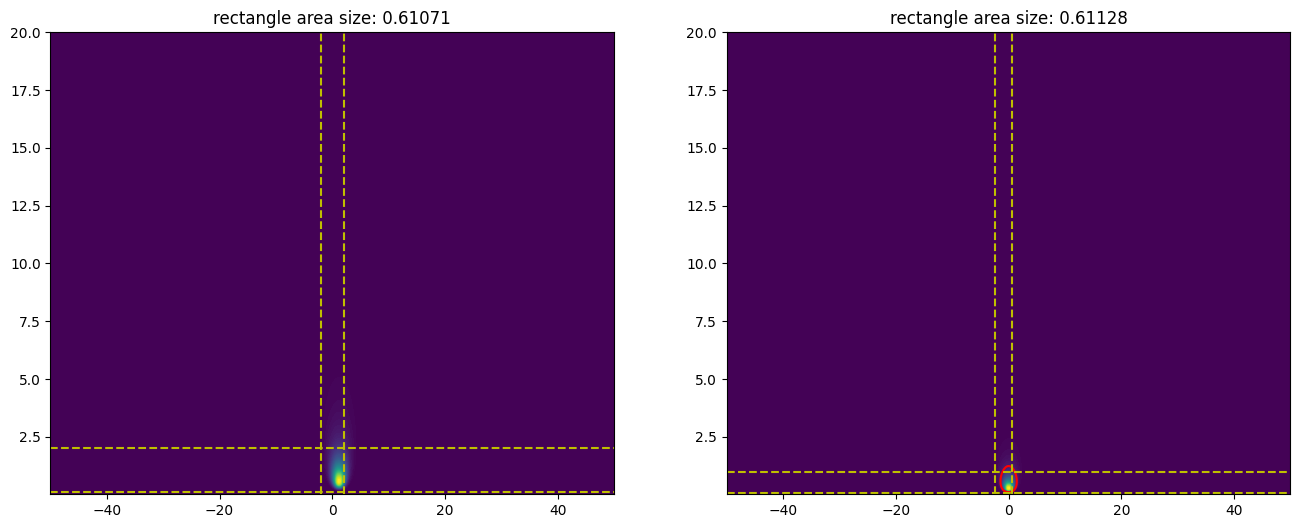

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
mu_0 = 1.2
lambda_ = 1.2
alpha = 2.1
beta = 2.1
# Second Figure
mu_s, mu_l, mu_n = -50, 50, 1000
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 1000
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], -2), np.searchsorted(mu_grid[0], 2)
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1), np.searchsorted(sigma2_grid[:,0], 2)
print("idx: ",(mu_s_idx, mu_l_idx), (sigma2_s_idx, sigma2_l_idx))
print("value: ",(mu_grid[0][mu_s_idx], mu_grid[0][mu_l_idx]), (sigma2_grid[:,0][sigma2_s_idx], sigma2_grid[:,0][sigma2_l_idx]))
print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])

ax[0].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
ax[0].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[0].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[0].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[0].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.05f}")

# Second Figure
mu_s, mu_l, mu_n = -50, 50, 1000
sigma2_s, sigma2_l, sigma2_n = 0.01, 20, 1000
mu_values = np.linspace(mu_s, mu_l, mu_n)
sigma2_values = np.linspace(sigma2_s, sigma2_l, sigma2_n)
dmu = (mu_l-mu_s)/mu_n
dsigma2 = (sigma2_l-sigma2_s)/sigma2_n
dA = dmu * dsigma2
# 그리드를 만들어 결합 확률 밀도를 계산
mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)

mu_s_idx, mu_l_idx = np.searchsorted(mu_grid[0], (-2-mu_0)*np.sqrt(lambda_/beta)), np.searchsorted(mu_grid[0], (2-mu_0)*np.sqrt(lambda_/beta))
sigma2_s_idx, sigma2_l_idx = np.searchsorted(sigma2_grid[:,0], 0.1/beta), np.searchsorted(sigma2_grid[:,0], 2/beta)
print("idx: ",(mu_s_idx, mu_l_idx), (sigma2_s_idx, sigma2_l_idx))
print("value: ",(mu_grid[0][mu_s_idx], mu_grid[0][mu_l_idx]), (sigma2_grid[:,0][sigma2_s_idx], sigma2_grid[:,0][sigma2_l_idx]))
print('pdf value: ',pdf_values[sigma2_s_idx, mu_l_idx])


ax[1].contourf(mu_grid, sigma2_grid, pdf_values, levels=np.linspace(0, pdf_values.max(), 100), cmap='viridis')
contour = ax[1].contour(mu_grid, sigma2_grid, pdf_values, levels=[0.08], colors='r')
contour_path = contour.collections[0].get_paths()[0]
mask = np.array([contour_path.contains_point((xi, yi)) for xi, yi in zip(mu_grid.flatten(), sigma2_grid.flatten())])
masked_values = pdf_values.flatten()[mask]
print("sum: ",np.sum(masked_values) * dA)

ax[1].axvline(x=mu_grid[0][mu_s_idx], color='y', linestyle='--')
ax[1].axvline(x=mu_grid[0][mu_l_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_s_idx], color='y', linestyle='--')
ax[1].axhline(y=sigma2_grid[:,0][sigma2_l_idx], color='y', linestyle='--')
ax[1].set_title(f"rectangle area size: {pdf_values[sigma2_s_idx:sigma2_l_idx, mu_s_idx:mu_l_idx].sum() * dA:.05f}")
plt.show()

# mu 쪽은 표준화 완료! 이제 sigma2 쪽을 해야하는데...

In [21]:
mu_grid[0][5200], sigma2_grid[:,0][5]

IndexError: index 5200 is out of bounds for axis 0 with size 1000

In [ ]:
norm.cdf(2.005200520052007, mu_0, np.sqrt(0.11005005005005004/lambda_)), norm.cdf((2.005200520052007-mu_0)*np.sqrt(lambda_), 0, np.sqrt(0.11005005005005004))

In [ ]:
print(nig_joint_pdf(2.005200520052007, 0.11005005005005004, mu_0, lambda_, alpha, beta), nig_joint_pdf((2.005200520052007-mu_0)*lambda_, 0.11005005005005004, 0, 1, alpha, beta))

# Normal part (mean = mu, variance = sigma2)
norm_pdf = norm.pdf((2.005200520052007-mu_0)/np.sqrt(0.11005005005005004 / lambda_), 0, 1)

# Inverse gamma part (variance = sigma2)
invgamma_pdf = invgamma.pdf(0.11005005005005004, alpha, scale=beta)
print(norm_pdf * invgamma_pdf)

In [ ]:
pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)
print(pdf_values[5, 5200])
print(mu_
print(nig_joint_pdf(mu_grid[0][5200], sigma2_grid[:,0][5], mu_0, lambda_, alpha, beta))

In [ ]:
-0.656/np.sqrt(lambda_/beta)+mu_0, 0.186*beta#, lambda_, alpha, beta

# get point memory

In [15]:
from scipy import special
import numpy as np

In [16]:
def calculate_cdf_contour_level(pdf_values, target_cdf):
    # 확률밀도함수 값들을 1D로 변환한 후 정렬
    sorted_pdf = np.sort(pdf_values.flatten())[::-1]
    cumulative_sum = np.cumsum(sorted_pdf)
    cumulative_sum /= cumulative_sum[-1]  # 누적 합을 0~1 사이의 값으로 정규화
    
    # CDF에 해당하는 값을 찾기
    contour_value = sorted_pdf[np.searchsorted(cumulative_sum, target_cdf)]
    return contour_value


In [43]:
from tqdm import tqdm
from scipy.optimize import root_scalar

In [67]:
target_cdf = 0.9
for target_cdf in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    a_memory = dict()
    for alpha in tqdm([round(1+x/100,2) for x in range(1,10000)]):
        # Second Figure
        mu_values = np.linspace(-5, 5, 100)
        sigma2_values = np.linspace(0.01, 5, 100)

        # 그리드를 만들어 결합 확률 밀도를 계산
        mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
        std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, 0, 1, alpha, 1)

        # 입력받은 CDF 값에 해당하는 등고선 값을 계산
        contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)


        # get y coordinate
        c = contour_level
        target_pdf_value = c / (special.gamma(alpha+0.5) / special.gamma(alpha) / np.sqrt(1) *np.sqrt(1) / np.sqrt(2*np.pi))
        
        
        # break     
        def equation(x):
            return invgamma.pdf(x, alpha+0.5, scale=1) - target_pdf_value
        # print(equation(1/(alpha+1)))
        # l = np.linspace(-10, 10, 1000)
        # plt.plot(l, invgamma.pdf(l, alpha+0.5, scale=1))
        # plt.axhline(y=target_pdf_value)
        # plt.axvline(x=1/(alpha+1), color='r')
        # plt.show()
        # break
        # large_sigma2
        # 초기 추정값 설정 후 방정식 해결
        initial_guess = 1/(alpha+1)#0.1/(alpha-1+np.finfo(float).eps)
        while True:
            # large_y = fsolve(equation, initial_guess)[0]
            large_y = root_scalar(equation, bracket=(1/(alpha+1), 10), method='brentq').root
            if initial_guess == large_y:
                initial_guess /= 10
            else:
                if large_y > 10000: # overflow
                    initial_guess*=2
                else:
                    break

        # small_sigma2
        # 초기 추정값 설정 후 방정식 해결
        initial_guess = 1#1/(alpha-1.5+np.finfo(float).eps)
        while True:
            # small_y = fsolve(equation, initial_guess)[0]
            small_y = root_scalar(equation, bracket=(0, 1/(alpha+1)), method='brentq').root
            if initial_guess <= small_y:
                initial_guess /= 10
            else:
                if small_y > 10000: # overflow
                    initial_guess*=2
                else:
                    break


        # get x coordinate
        y = np.exp((np.log(np.sqrt(1)*1**alpha/(np.sqrt(2*np.pi)*special.gamma(alpha)))-np.log(c))/(alpha+3/2)-1)
        large_x = np.sqrt(-2*y/1*np.log(c/invgamma.pdf(y,alpha,scale=1)*np.sqrt(2*np.pi*y)/np.sqrt(1)))
        small_x = -large_x # since mu_0 is 0 at standardized NIG.
        a_memory[alpha] = [small_x, large_x, small_y, large_y]

        # plt.contourf(mu_values, sigma2_values, std_pdf_values)
        # plt.scatter(large_x, large_y, marker='x', color='r')
        # plt.scatter(large_x, small_y, marker='x', color='b')
        # plt.scatter(small_x, large_y, marker='x', color='g')
        # plt.scatter(small_x, small_y, marker='x', color='y')
        # plt.title(f'{large_x, small_x, large_y, small_y}')
        # plt.show()
#     colors = np.linspace(0, 1, len(np.array(list(a_memory.values()))))
#     plt.scatter(*np.array(list(a_memory.values())).T, c = colors, s=1)
#     plt.show()

#     colors = np.linspace(0, 1, len(np.array(list(a_memory.values()))))
#     plt.scatter(*np.array(list(a_memory.values())).T, c = colors, s=1)
#     plt.xlim(-0.5,3)
#     # plt.ylim(-0.5,5)
#     plt.grid(True)
#     plt.show()

    import pickle

    with open(f'../a_memory_sets/a_memory_{target_cdf}.pickle', 'wb') as fw:
        pickle.dump(a_memory, fw)

100%|██████████████████████████████████████| 9999/9999 [00:18<00:00, 545.07it/s]


# get the original worst case mu and sigma

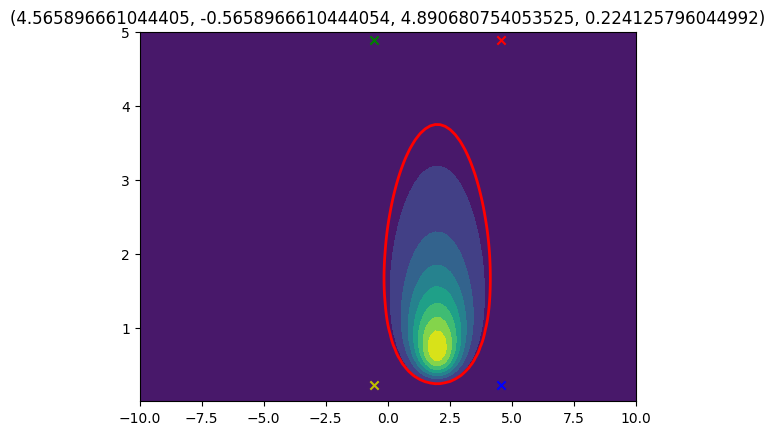

In [80]:
target_cdf = 0.8

a_memory = dict()
with open(f'../a_memory_sets/a_memory_{target_cdf}.pickle', 'rb') as f:
    a_memory = pickle.load(f)

mu_0, lambda_, alpha, beta = 2, 1.2, 1.4, 2.1

small_x, large_x, small_y, large_y = a_memory[alpha]
small_x = small_x / np.sqrt(lambda_/beta) + mu_0
large_x = large_x / np.sqrt(lambda_/beta) + mu_0
small_y = small_y * beta
large_y = large_y * beta
# for x in [small_x, large_x]:
    
#     mu, sigma2 = zx / np.sqrt(lambda_/beta)+mu_0, zy * beta



mu_values = np.linspace(-10, 10, 100)
sigma2_values = np.linspace(0.01, 5, 100)

mu_grid, sigma2_grid = np.meshgrid(mu_values, sigma2_values)
std_pdf_values = nig_joint_pdf(mu_grid, sigma2_grid, mu_0, lambda_, alpha, beta)

contour_level = calculate_cdf_contour_level(std_pdf_values, target_cdf)

plt.contour(mu_grid, sigma2_grid, std_pdf_values, levels=[contour_level], colors='red', linewidths=2)
plt.contourf(mu_values, sigma2_values, std_pdf_values)

plt.scatter(large_x, large_y, marker='x', color='r')
plt.scatter(large_x, small_y, marker='x', color='b')
plt.scatter(small_x, large_y, marker='x', color='g')
plt.scatter(small_x, small_y, marker='x', color='y')
plt.title(f'{large_x, small_x, large_y, small_y}')
plt.show()

# get the CVaR

In [28]:
epsilon = 0.95
kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
CVaR = mu + kappa * np.sqrt(sigma2)

# plot the interactive boundary with respect to the CDF value

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import numpy as np
from scipy import stats
from scipy import special
from tqdm import tqdm

In [30]:
x = 0
p = 8
epsilon = 0.95
mean = 6
l = np.linspace(-10, 8, 100)
point_dist = norm(mean, 0.08)
# plt.plot(l, point_dist.pdf(l))
# plt.show()

cost_mu = x-p+mean/2

sigma = 0.8
print(cost_mu)
cost_dist = norm(cost_mu, sigma)

def update(mu_0, lambda_, alpha, beta):
    
    plt.plot(l, cost_dist.pdf(l))
    # VaR = cost_dist.ppf(epsilon)
    VaR = cost_dist.ppf(epsilon)
    VaR = norm.ppf(epsilon, cost_mu, sigma)
    CVaR = cost_mu + sigma * norm.pdf(norm.ppf(epsilon))/(1-epsilon)
    plt.axvline(cost_mu, color='y', linestyle='--', label=f'cost mean = {cost_mu:.2f}')
    
    plt.axvline(VaR, color='g', linestyle='--', label=f'VaR (epsilon={epsilon*100}%) = {VaR:.2f}')
    plt.axvline(CVaR, color='r', linestyle='--', label=f'CVaR (epsilon={epsilon*100}%) = {CVaR:.2f}')
    
    gamma = np.sqrt(epsilon / (1-epsilon))
    theta = 0.01
    DR_CVaR = cost_mu + gamma * sigma + theta * np.sqrt(1+gamma**2)
    plt.axvline(DR_CVaR, color='pink', linestyle='--', label=f'DR_CVaR (epsilon={epsilon*100}%) = {DR_CVaR:.2f}')
    
    # mu_0, lambda_, alpha, beta = 3.4548569, 0.02503136, 4.8973227, 0.06900783
    
    # t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))
    
    # uc_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
    # plt.axvline(uc_st_CVaR, color='purple', linestyle='--', label=f'uncertain st_CVaR (epsilon={epsilon*100}%) = {uc_st_CVaR:.2f}')
    
    # mu_0, lambda_, alpha, beta = 5.920605, 0.88203037, 4.362318, 0.01417785
    
    # t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))
    
    
    
    zx, zy = a_memory[float(f'{alpha:.02f}')]
    mu, sigma2 = zx / np.sqrt(lambda_/beta)+mu_0, zy * beta
    plt.plot(l, norm.pdf(l, mu, np.sqrt(sigma2)))
    kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
    DR_EDL_CVaR = mu + kappa * np.sqrt(sigma2)
    # dro_edl_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
    plt.axvline(DR_EDL_CVaR, color='brown', linestyle='--', label=f'DRO-EDL-CVaR (epsilon={epsilon*100}%) = {DR_EDL_CVaR:.2f}')
    
    
    
    
    plt.title(f"DRO worst case $\mu$: {mu:.02f}, $\sigma^2$: {sigma2:.02f}")
    plt.legend()
# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
})

display(ui, out)

-5.0


Output()

$\mu, \sigma^2$

In [117]:
def update(mu_0, lambda_, alpha, beta):

    zx, zy = a_memory[float(f'{alpha:.02f}')]
    mu, sigma2 = zx / np.sqrt(lambda_/beta)+mu_0, zy * beta
    
    kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
    DR_EDL_CVaR = mu + kappa * np.sqrt(sigma2)


    # plot figure
    plt.figure()
    plt.axvline(p-mean/2, color='maroon', linestyle='--', label=f'GT boundary = {cost_mu:.2f}')
    
    l = np.linspace(-20, 20, 100)
    plt.plot(l, norm.pdf(l, p-mean/2, sigma))
    
    labels = ['VaR', 'CVaR', 'DR_CVaR', 'DR_EDL_CVaR']
    for i, risk in enumerate([VaR, CVaR, DR_CVaR, DR_EDL_CVaR]):
        plt.plot(l, (lambda x: x+risk)(l), label=labels[i])
    plt.xlim(-10,10)
    plt.ylim(-5,10)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True, which='both')
    plt.title("DRO-EDL with ambiguity set CDF: 90%, CVaR epsilon: 95%")
    plt.xlabel("Ego Position")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()


# 파라미터 조절 위젯 생성
mu_0_slider = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='μ₀ (prior mean)')
lambda_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='λ (precision)')
alpha_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='α (shape)')
beta_slider = widgets.FloatSlider(value=2, min=0.1, max=10, step=0.1, description='β (scale)')

# 대화형 위젯으로 출력
ui = widgets.VBox([mu_0_slider, lambda_slider, alpha_slider, beta_slider])
out = widgets.interactive_output(update, {
    'mu_0': mu_0_slider, 
    'lambda_': lambda_slider, 
    'alpha': alpha_slider, 
    'beta': beta_slider, 
})

display(ui, out)

Output()